# Moisture Advection

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import metpy.calc as mcalc 
from metpy.units import units
import glob
import xarray as xr

from datetime import datetime, timedelta
from functools import partial
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import Normalize

In [25]:
path_staging = "/data/project/ARM_Summer_School_2024_Data/lasso_tutorial/cacti/lasso-cacti"
file_list = sorted(glob.glob(f'{path_staging}/20190129/eda09/base/les/subset_d3/corlasso_met_*'))

In [33]:
ds = xr.open_dataset(file_list[30])

In [34]:
ds

<xarray.Dataset> Size: 6GB
Dimensions:               (Time: 1, south_north: 865, west_east: 750,
                           bottom_top: 149)
Coordinates:
  * Time                  (Time) datetime64[ns] 8B 2019-01-29T13:30:00
    XLONG                 (south_north, west_east) float32 3MB ...
    XLAT                  (south_north, west_east) float32 3MB ...
    XTIME                 (Time) float32 4B ...
Dimensions without coordinates: south_north, west_east, bottom_top
Data variables: (12/52)
    ITIMESTEP             (Time) int32 4B ...
    MUTOT                 (Time, south_north, west_east) float32 3MB ...
    HGT                   (Time, south_north, west_east) float32 3MB ...
    HAMSL                 (Time, bottom_top, south_north, west_east) float32 387MB ...
    P_HYD                 (Time, bottom_top, south_north, west_east) float32 387MB ...
    PRESSURE              (Time, bottom_top, south_north, west_east) float32 387MB ...
    ...                    ...
    MULFC                 (Time, south_north, west_east) float32 3MB ...
    MULNB                 (Time, south_north, west_east) float32 3MB ...
    MULPL                 (Time, south_north, west_east) float32 3MB ...
    MUCAPE                (Time, south_north, west_east) float32 3MB ...
    MUCIN                 (Time, south_north, west_east) float32 3MB ...
    REFL_10CM_MAX         (Time, south_north, west_east) float32 3MB ...
Attributes: (12/39)
    DX:                          500.0
    DY:                          500.0
    SIMULATION_START_DATE:       2019-01-29_06:00:00
    WEST-EAST_GRID_DIMENSION:    751
    SOUTH-NORTH_GRID_DIMENSION:  866
    BOTTOM-TOP_GRID_DIMENSION:   150
    ...                          ...
    doi_isPartOf_lasso-cacti:    https://doi.org/10.5439/1905789
    doi_isDocumentedBy:          https://doi.org/10.2172/1905845
    doi_thisFileType:            https://doi.org/10.5439/1905819
    history:                     processed by user d3m088 on machine cirrus89...
    filename_user:               corlasso_met_2019012900eda09d3_base_M1.m1.20...
    filename_storage:            corlassomet2019012900eda09d3baseM1.m1.201901...

In [35]:
theta = ds.QVAPOR[0,0,:,:]
u = ds.UMET10[0,:,:]
v = ds.VMET10[0,:,:]

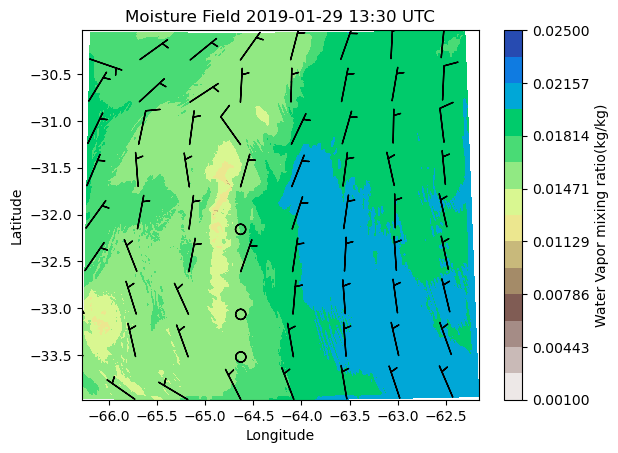

In [36]:
space =100

cf=plt.contourf(ds.XLONG,ds.XLAT,theta, cmap='terrain_r', levels=np.linspace(0.001,0.025, 15))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
time_label=plt.title('Moisture Field')
tx_time= plt.title(f"Moisture Field {pd.to_datetime(ds['Time'])[0]:%Y-%m-%d %H:%M} UTC")

ba = plt.barbs(ds.XLONG [::space, ::space], ds.XLAT[::space, ::space], u[::space, ::space],v[::space, ::space])
plt.colorbar(cf, label='Water Vapor mixing ratio(kg/kg)')

In [37]:
ds = xr.open_dataset(file_list[50])

In [38]:
theta = ds.QVAPOR[0,0,:,:]
u = ds.UMET10[0,:,:]
v = ds.VMET10[0,:,:]

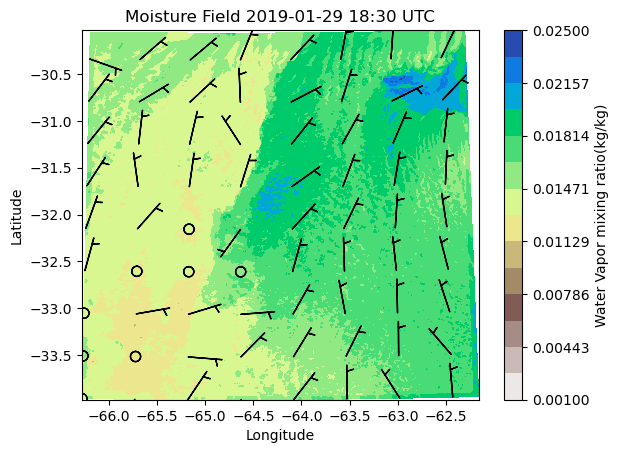

In [39]:
space =100

cf=plt.contourf(ds.XLONG,ds.XLAT,theta, cmap='terrain_r', levels=np.linspace(0.001,0.025, 15))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
time_label=plt.title('Moisture Field')
tx_time= plt.title(f"Moisture Field {pd.to_datetime(ds['Time'])[0]:%Y-%m-%d %H:%M} UTC")

ba = plt.barbs(ds.XLONG [::space, ::space], ds.XLAT[::space, ::space], u[::space, ::space],v[::space, ::space])
plt.colorbar(cf, label='Water Vapor mixing ratio(kg/kg)')

In [40]:
ds = xr.open_dataset(file_list[70])

In [41]:
theta = ds.QVAPOR[0,0,:,:]
u = ds.UMET10[0,:,:]
v = ds.VMET10[0,:,:]

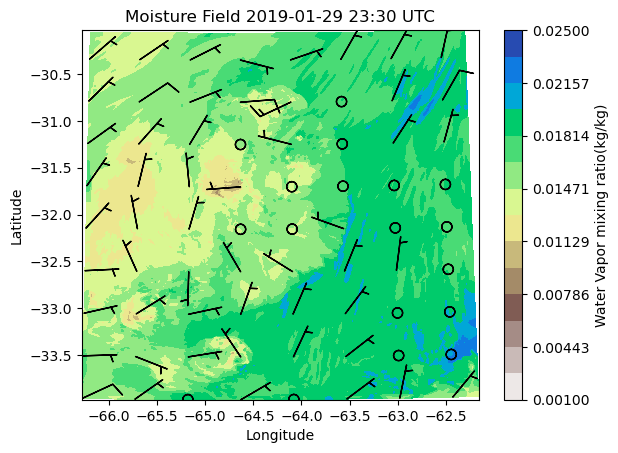

In [42]:
space =100

cf=plt.contourf(ds.XLONG,ds.XLAT,theta, cmap='terrain_r', levels=np.linspace(0.001,0.025, 15))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
time_label=plt.title('Moisture Field')
tx_time= plt.title(f"Moisture Field {pd.to_datetime(ds['Time'])[0]:%Y-%m-%d %H:%M} UTC")

ba = plt.barbs(ds.XLONG [::space, ::space], ds.XLAT[::space, ::space], u[::space, ::space],v[::space, ::space])
plt.colorbar(cf, label='Water Vapor mixing ratio(kg/kg)')

## Cross Sections

In [116]:
path_staging = "/data/project/ARM_Summer_School_2024_Data/lasso_tutorial/cacti/lasso-cacti"
file_list = sorted(glob.glob(f'{path_staging}/20190129/eda09/base/les/subset_d3/corlasso_met_*'))

ntimes=73
ds= xr.open_mfdataset(file_list[:ntimes])

file_list = sorted(glob.glob(f'{path_staging}/20190129/eda09/base/les/subset_d3/corlasso_cld_*'))
ds2= xr.open_mfdataset(file_list[:ntimes])

/tmp/ipykernel_1683/1194218404.py:73: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pcm= ax.pcolormesh(lonslice.values, hamsl_raw.values, plotdata_raw.isel(Time=0).values,


(750, 149)
(15, 75)
(15, 75)
(15, 75)
(15, 75)


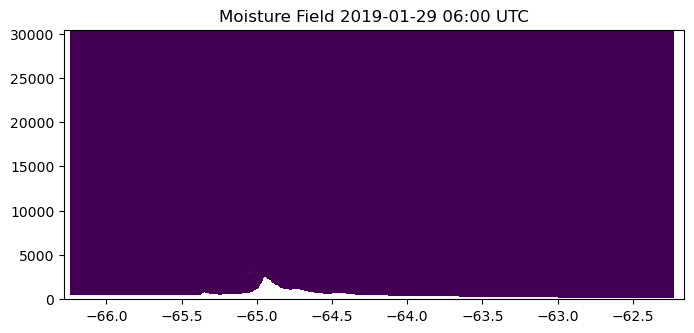

plotting frame  0
(15, 75)
(15, 75)
plotting frame  0
(15, 75)
(15, 75)
plotting frame  1
(15, 75)
(15, 75)
plotting frame  2
(15, 75)
(15, 75)
plotting frame  3
(15, 75)
(15, 75)
plotting frame  4
(15, 75)
(15, 75)
plotting frame  5
(15, 75)
(15, 75)
plotting frame  6
(15, 75)
(15, 75)
plotting frame  7
(15, 75)
(15, 75)
plotting frame  8
(15, 75)
(15, 75)
plotting frame  9
(15, 75)
(15, 75)
plotting frame  10
(15, 75)
(15, 75)
plotting frame  11
(15, 75)
(15, 75)
plotting frame  12
(15, 75)
(15, 75)
plotting frame  13
(15, 75)
(15, 75)
plotting frame  14
(15, 75)
(15, 75)
plotting frame  15
(15, 75)
(15, 75)
plotting frame  16
(15, 75)
(15, 75)
plotting frame  17
(15, 75)
(15, 75)
plotting frame  18
(15, 75)
(15, 75)
plotting frame  19
(15, 75)
(15, 75)
plotting frame  20
(15, 75)
(15, 75)
plotting frame  21
(15, 75)
(15, 75)
plotting frame  22
(15, 75)
(15, 75)
plotting frame  23
(15, 75)
(15, 75)
plotting frame  24
(15, 75)
(15, 75)
plotting frame  25
(15, 75)
(15, 75)
plotting fra

<Figure size 640x480 with 0 Axes>

In [117]:
# User settings...

# Case date and times to plot:
case_date = datetime(2019, 1, 29)
single_time = case_date + timedelta(hours=20, minutes=15)  # time for single-time plots

# Simulation selection within the case date:
ens_name = "eda09"
config_label = "base"
domain = 2



plot_lat= -32.1264  #S


# Next, we have to figure out which j-index to sample for the desired latitude. WRF's coordinate name for this dimension is south_north.
# We will ignore the map projection and pull along a single j index, which we will determine from the middle of the grid.
lats = ds2["XLAT"]
lons = ds2["XLONG"]
nlat, nlon = lons.shape
abslat = np.abs(lats.isel(west_east=int(nlon/2)) - plot_lat)
jloc = np.argmin(abslat.values)
lonslice = lons.isel(south_north=jloc)
hamsl_raw = ds['HAMSL'].isel(Time=0, south_north=jloc)  # height of each grid cell on the raw model levels


# ...and now the data we actually want to plot, which is clouds
plotdata_raw = 1000.*(
    ds2['QCLOUD'].sel(south_north=jloc) +
    ds2['QICE'].sel(south_north=jloc)
    )  # cloud water+ice mixing ratio converted go g/kg

#pcm=plotdata_raw.isel(Time=0).plot()



def plot_subsequent_frame(itime, plotdata_raw, pcm, tx_time, ba, ba_U, ba_V,ifreq):
    """
    Subroutine to plot the next frame of an animation after the first frame is already defined. 
    This is to be called by animation.FuncAnimation. 
    
    Note that some data is pulled from global scope. Variables accessed from outside the subroutine:
        pcm = pcolormesh object from the initial frame
        tx_time = text annotation object for the time label from the initial frame

        plotdata_raw = variable holding the time series of data to plot
        plot_lat = latitude being plotted (needed to reconstruct the title text)
    """
    print("plotting frame ", itime)

    # Overwrite the data in memory for the values displayed in the plot...
    # NOTE: This is technically a faux paux for WRF since the model levels are not constant in time. BE CAREFUL!
    #       However, in this situation the levels are not going to change so much as to make the plot visibly change much.
    pcm.set_array(plotdata_raw.isel(Time=itime).values.ravel())

    print(ba_U.isel(Time=itime).values[::ifreq, ::ifreq].shape)
    print(ba_V.isel(Time=itime).values[::ifreq, ::ifreq].shape) 
    

    #ba.set_UVC(ba_U.isel(Time=itime).values[::ifreq, ::ifreq].ravel(),ba_V.isel(Time=itime).values[::ifreq, ::ifreq].ravel())

    # Update the time label...
    time_label = f"{pd.to_datetime(plotdata_raw['Time'])[itime]:%Y-%m-%d %H:%M} UTC"
    tx_time.set_text(f"Cloud Condensate; \n{time_label}")




# end plot_subsequent_frame()

fig, ax = plt.subplots(1, 1, figsize=[8,3.5])
pcm= ax.pcolormesh(lonslice.values, hamsl_raw.values, plotdata_raw.isel(Time=0).values,
                   shading='auto',norm=Normalize(vmin=0,vmax=1.25))
#pcm=plotdata_raw.plot()
#theta = ds.QVAPOR[0,0,:,:]

da_u = ds["UMET"].isel(south_north=jloc)
da_v = ds["VMET"].isel(south_north=jloc)

space =100

cf=plt.contourf(ds.XLONG,ds.XLAT,theta)
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
tx_time= plt.title(f"Moisture Field {pd.to_datetime(plotdata_raw['Time'])[0]:%Y-%m-%d %H:%M} UTC")


lonslice2d = (lonslice+(hamsl_raw*0)).T
print(lonslice2d.T.shape)
#print(hamsl_raw.isel(Time=0).shape)
#print(da_u.isel(Time=0).shape)
da_u = ds["UMET"].isel(south_north=jloc)
da_v = ds["VMET"].isel(south_north=jloc)
ifreq = 10

print(lonslice2d.values[::ifreq,::ifreq].shape)
print(hamsl_raw.values[::ifreq,::ifreq].shape) 
print(da_u.isel(Time=0).values[::ifreq,::ifreq].shape)
print(da_v.isel(Time=0).values[::ifreq,::ifreq].shape)

#plt.barbs(lonslice2d.values[::ifreq,::ifreq], hamsl_raw.values[::ifreq,::ifreq], da_u.isel(Time=0).values[::ifreq,::ifreq], da_v.isel(Time=0).values[::ifreq,::ifreq],color='w')
# plt.pcolormesh(lonslice.values, hamsl_raw.isel(Time=0).values, da_v.isel(Time=0).values)
plt.show()


plt.colorbar(cf, label='Water Vapor mixing ratio(kg/kg)')



#-----------------------------------------------------------------------
# Now, update the underlying data in the plot for each subsequent frame...

# NOTE: See https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.FuncAnimation.html for
#       explaination of how to use functools.partial for passing arguments to the redraw subroutine.
ani = animation.FuncAnimation(fig, 
                              partial(plot_subsequent_frame, plotdata_raw=plotdata_raw, pcm=pcm, tx_time=tx_time,ba=ba,ba_U=da_u,ba_V=da_v,ifreq=ifreq),
                              frames=range(ntimes))

# And save the results...
filename_mp4 = f"./corlasso_anim_qci_{case_date:%Y%m%d}00{ens_name}d{domain}_{config_label}.mp4"
fps = 6 if domain < 3 else 8  # set frame rate for dt=15 vs. 5 minutes
ani.save(filename_mp4, writer=animation.FFMpegWriter(fps=fps, bitrate=5000, codec="h264"), dpi=150)

#### **QCloud + QIce for Domain 2, 29-Jan-2019, EDA09 Forcing:**  
[corlasso_anim_qci_2019012900eda09d2_base.mp4](corlasso_anim_qci_2019012900eda09d2_base.mp4)  
<video src="corlasso_anim_qci_2019012900eda09d2_base.mp4" controls></video>

In [38]:
ds

<xarray.Dataset> Size: 59GB
Dimensions:               (Time: 10, south_north: 865, west_east: 750,
                           bottom_top: 149)
Coordinates:
  * Time                  (Time) datetime64[ns] 80B 2019-01-29T06:00:00 ... 2...
    XLONG                 (south_north, west_east) float32 3MB dask.array<chunksize=(865, 750), meta=np.ndarray>
    XLAT                  (south_north, west_east) float32 3MB dask.array<chunksize=(865, 750), meta=np.ndarray>
    XTIME                 (Time) float32 40B dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: south_north, west_east, bottom_top
Data variables: (12/52)
    ITIMESTEP             (Time) int32 40B dask.array<chunksize=(1,), meta=np.ndarray>
    MUTOT                 (Time, south_north, west_east) float32 26MB dask.array<chunksize=(1, 865, 750), meta=np.ndarray>
    HGT                   (Time, south_north, west_east) float32 26MB dask.array<chunksize=(1, 865, 750), meta=np.ndarray>
    HAMSL                 (Time, bottom_top, south_north, west_east) float32 4GB dask.array<chunksize=(1, 50, 289, 250), meta=np.ndarray>
    P_HYD                 (Time, bottom_top, south_north, west_east) float32 4GB dask.array<chunksize=(1, 50, 289, 250), meta=np.ndarray>
    PRESSURE              (Time, bottom_top, south_north, west_east) float32 4GB dask.array<chunksize=(1, 50, 289, 250), meta=np.ndarray>
    ...                    ...
    MULFC                 (Time, south_north, west_east) float32 26MB dask.array<chunksize=(1, 865, 750), meta=np.ndarray>
    MULNB                 (Time, south_north, west_east) float32 26MB dask.array<chunksize=(1, 865, 750), meta=np.ndarray>
    MULPL                 (Time, south_north, west_east) float32 26MB dask.array<chunksize=(1, 865, 750), meta=np.ndarray>
    MUCAPE                (Time, south_north, west_east) float32 26MB dask.array<chunksize=(1, 865, 750), meta=np.ndarray>
    MUCIN                 (Time, south_north, west_east) float32 26MB dask.array<chunksize=(1, 865, 750), meta=np.ndarray>
    REFL_10CM_MAX         (Time, south_north, west_east) float32 26MB dask.array<chunksize=(1, 865, 750), meta=np.ndarray>
Attributes: (12/39)
    DX:                          500.0
    DY:                          500.0
    SIMULATION_START_DATE:       2019-01-29_06:00:00
    WEST-EAST_GRID_DIMENSION:    751
    SOUTH-NORTH_GRID_DIMENSION:  866
    BOTTOM-TOP_GRID_DIMENSION:   150
    ...                          ...
    doi_isPartOf_lasso-cacti:    https://doi.org/10.5439/1905789
    doi_isDocumentedBy:          https://doi.org/10.2172/1905845
    doi_thisFileType:            https://doi.org/10.5439/1905819
    history:                     processed by user d3m088 on machine cirrus89...
    filename_user:               corlasso_met_2019012900eda09d3_base_M1.m1.20...
    filename_storage:            corlassomet2019012900eda09d3baseM1.m1.201901...

In [65]:
print(ds)

<xarray.Dataset> Size: 39GB
Dimensions:      (Time: 10, bottom_top: 149, south_north: 865, west_east: 750)
Coordinates:
  * Time         (Time) datetime64[ns] 80B 2019-01-29T06:00:00 ... 2019-01-29...
    XLONG        (south_north, west_east) float32 3MB dask.array<chunksize=(865, 750), meta=np.ndarray>
    XLAT         (south_north, west_east) float32 3MB dask.array<chunksize=(865, 750), meta=np.ndarray>
    XTIME        (Time) float32 40B dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: bottom_top, south_north, west_east
Data variables: (12/14)
    ITIMESTEP    (Time) int32 40B dask.array<chunksize=(1,), meta=np.ndarray>
    QCLOUD       (Time, bottom_top, south_north, west_east) float32 4GB dask.array<chunksize=(1, 50, 289, 250), meta=np.ndarray>
    QRAIN        (Time, bottom_top, south_north, west_east) float32 4GB dask.array<chunksize=(1, 50, 289, 250), meta=np.ndarray>
    QICE         (Time, bottom_top, south_north, west_east) float32 4GB dask.array<c

In [76]:
print(theta.shape)
print(ds.THETA_E.shape)
print(ds2.QCLOUD.shape)

(865, 750)
(10, 149, 865, 750)
(10, 149, 865, 750)


In [98]:
print(lonslice.values.shape)
print(hamsl_raw.values.shape)
print(da_u.values.shape) 
print(da_v.values.shape)

(750,)
(149, 750)
(10, 149, 750)
(10, 149, 750)
